In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
amazon_data =pd.read_csv("amazon_price_train_test.csv")

In [4]:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [5]:
amazon_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000
1257,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500


In [6]:
amazon_data.shape

(1258, 7)

In [7]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,823.840056,831.762583,814.173943,823.256543,823.256543,4.231814e+06
std,477.931392,482.851261,471.058235,476.952699,476.952699,2.400533e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,393.892494,398.795006,388.427513,394.772492,394.772492,2.713950e+06
50%,726.450012,729.779999,720.079986,727.190002,727.190002,3.582300e+06
75%,1005.860016,1009.742493,997.122513,1002.762496,1002.762496,4.857900e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [10]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
amazon_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
amazon_data = amazon_data.drop(columns=['Adj Close'])

In [13]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,2316500


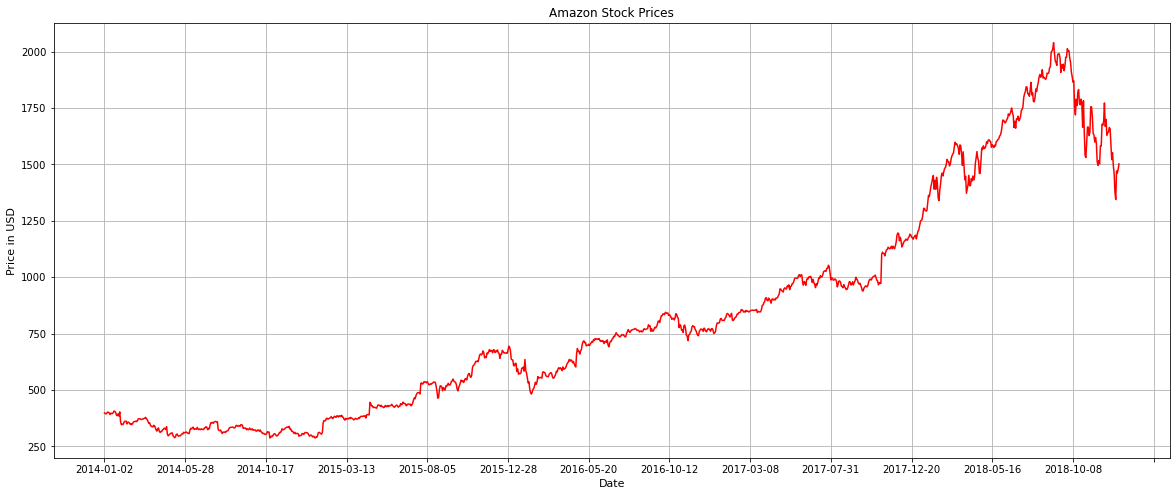

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize='11')
plt.title('Amazon Stock Prices')
plt.grid()
plt.show()

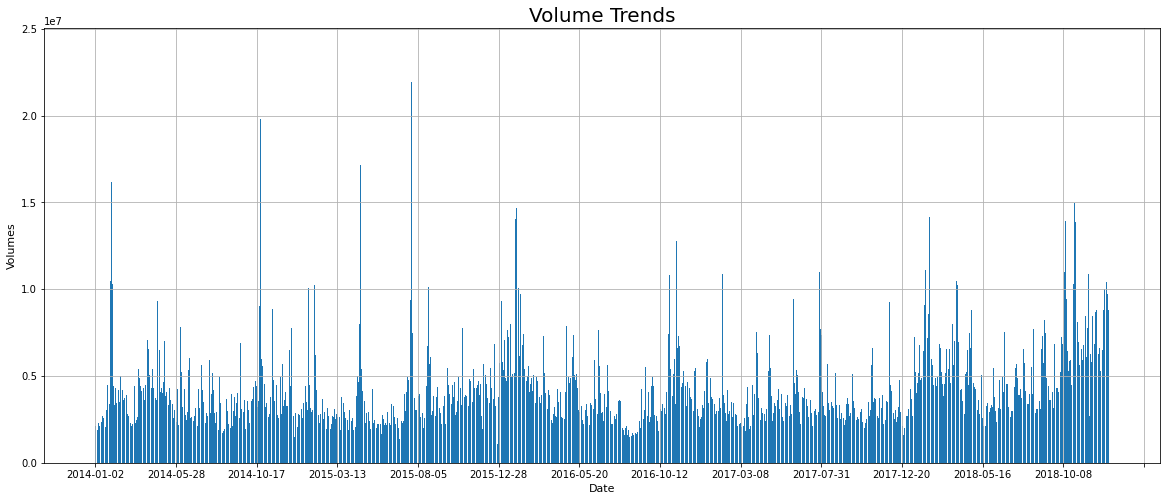

In [15]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(amazon_data['Date'], amazon_data['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Volumes', fontsize='11')
plt.title('Volume Trends', fontsize='20')
plt.grid()
plt.show()

In [16]:
amazon_data['Market Cap'] = amazon_data['Open']*amazon_data['Volume']

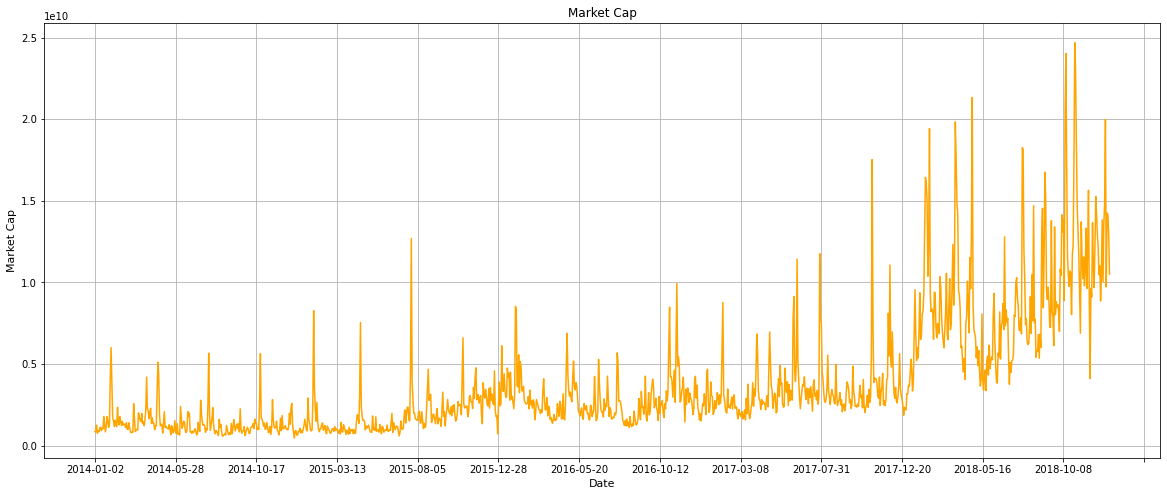

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(amazon_data['Date'], amazon_data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Market Cap', fontsize='11')
plt.title('Market Cap')
plt.grid()
plt.show()

In [18]:
amazon_data.iloc[amazon_data['Market Cap'].argmax()]

Date           2018-10-26
Open              1649.59
High              1698.46
Low                  1603
Close             1642.81
Volume           14963800
Market Cap    2.46841e+10
Name: 1214, dtype: object

In [20]:
from sklearn.preprocessing import MinMaxScaler
import math